# CS235 - Default of Credit Card Client Classification

Data source: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients



In [25]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# needed to open .xls (old excel format) file 
!pip install xlrd

In [27]:
# load in data
df = pd.read_excel('Data/default of credit card clients.xls', skiprows=1)

## Data Overview

In [28]:
df.shape

(30000, 25)

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# all data type is int
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Data Cleaning

In [31]:
# reset the index to 'ID'
df = df.set_index('ID')

In [32]:
# no missing values
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [33]:
# appears to be some duplicated items
# considering there is no personal information, only general demographic and credit
# it is quite possible the duplicates have identical info and are different people, therefore will leave them
df.duplicated().sum()

35

## Statistical Summary, Feature Descriptions, Distributions, and Correlations

In [34]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [35]:
#easier to copy/paste 
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [36]:
#Looking at the distribution of each feature:

limit_col = ['LIMIT_BAL']

demographic_dis = ['SEX', 'EDUCATION', 'MARRIAGE']
demographic_con = ['AGE']

pay_delay_cols = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

bill_cols = ['BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

payments_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

target_col = ['default payment next month']

# #discrete values
# dis_cols = ['SEX','EDUCATION', 'MARRIAGE',  'PAY_0', 'PAY_2','PAY_3',
#             'PAY_4', 'PAY_5', 'PAY_6','default payment next month'] 

In [48]:
#helper functions to help plot features
def plot_discrete(df, cols):
    # setting 3 cols
    n_cols = 3
    
    #integer div to check num rows, then check remainder, if yes then add another row
    n_rows = (len(cols) // 3) + (len(cols) % 3 > 0) 
    plt.figure(figsize=(15, n_rows * 4))  
    
    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)  #subplot for each col
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    
def plot_continuous(df, cols):
    # setting 3 cols
    n_cols = 3
    
    #integer div to check num rows, then check remainder, if yes then add another row
    n_rows = (len(cols) // 3) + (len(cols) % 3 > 0)  
    plt.figure(figsize=(15, n_rows * 4))  #adjust figsize as needed
    
    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)  #subplot for each column
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [49]:
1 % 3

1

### Limit Balance Data

The limit balance represents the amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

 

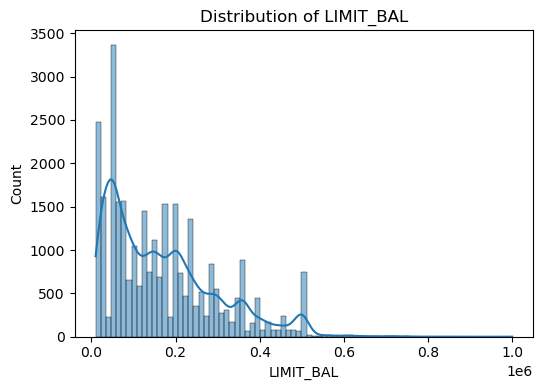

In [50]:
plot_continuous(df, limit_col)

### Demographic Data

- `SEX`
    - 1 = MALE
    - 2 = FEMALE

- `EDUCATION`: Highest level of education completed.
    - 1 = GRADUATE SCHOOL
    - 2 = UNIVERSITY
    - 3 = HIGHSCHOOL
    - 0, 4, 5, 6 = OTHER
    
- `MARRIAGE`:
    - 1 = MARRIED
    - 2 = SINGLE 
    - 3 = DIVORCE
    - 0 = OTHER
    

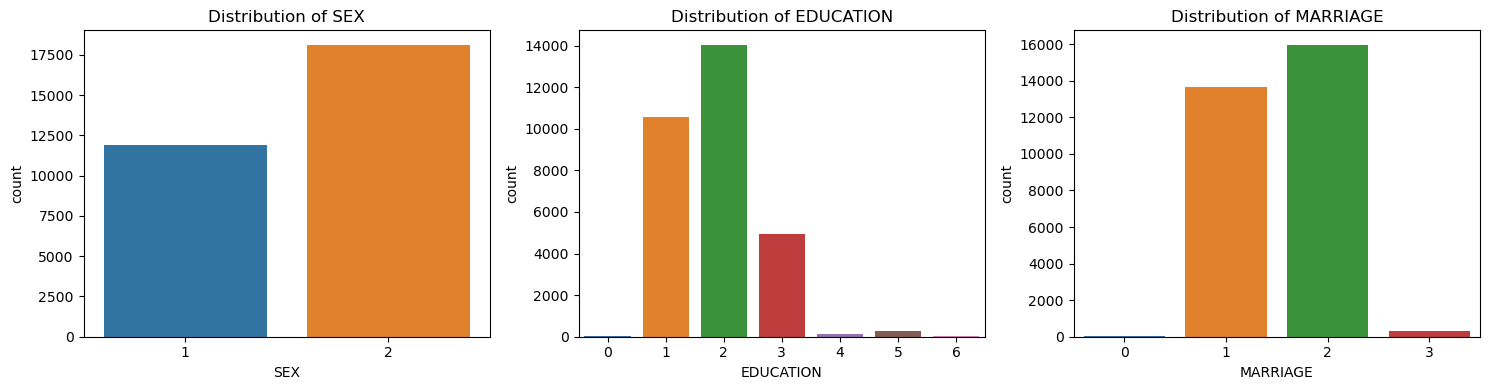

In [51]:
plot_discrete(df, demographic_dis)

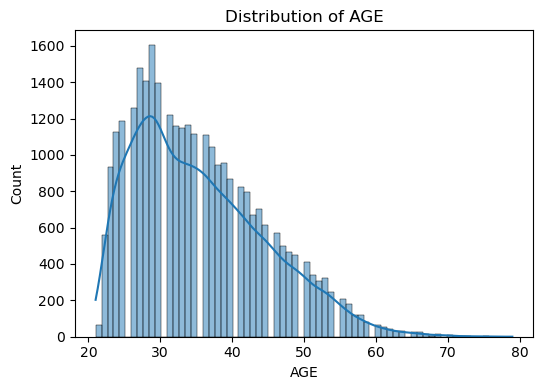

In [52]:
plot_continuous(df, demographic_con)

### Payment Timeliness Data

Tracks the history of past payments. `PAY_0` corresponds to payment is September up to `PAY_6` corresponding to payment in April. 

  - -2 = NO CONSUMPTION
  - -1 = PAID IN FULL
  - 0 = THE USE OF REVOLVING CREDIT
  - 1-8 = LENGTH OF DELAYED PAYMENT (IN MONTHS)
  - 9 = >= 9 MONTHS DELAYED PAYMENT

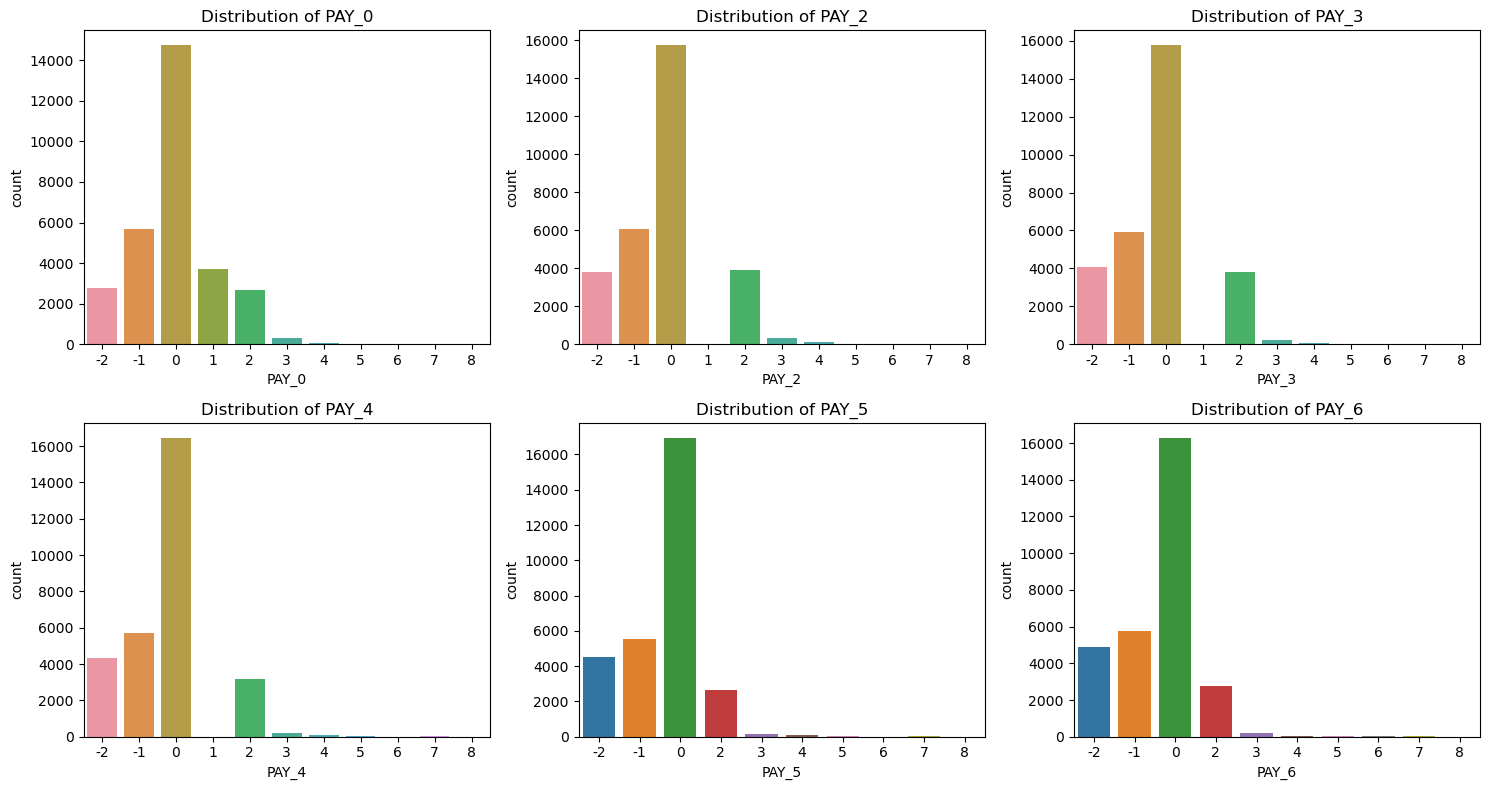

In [53]:
plot_discrete(df, pay_delay_cols)

### Bill Amount Data

The bill amount statement with `BILL_AMT1` corresponding to September, and `BILL_AMT6` corresponding to April.

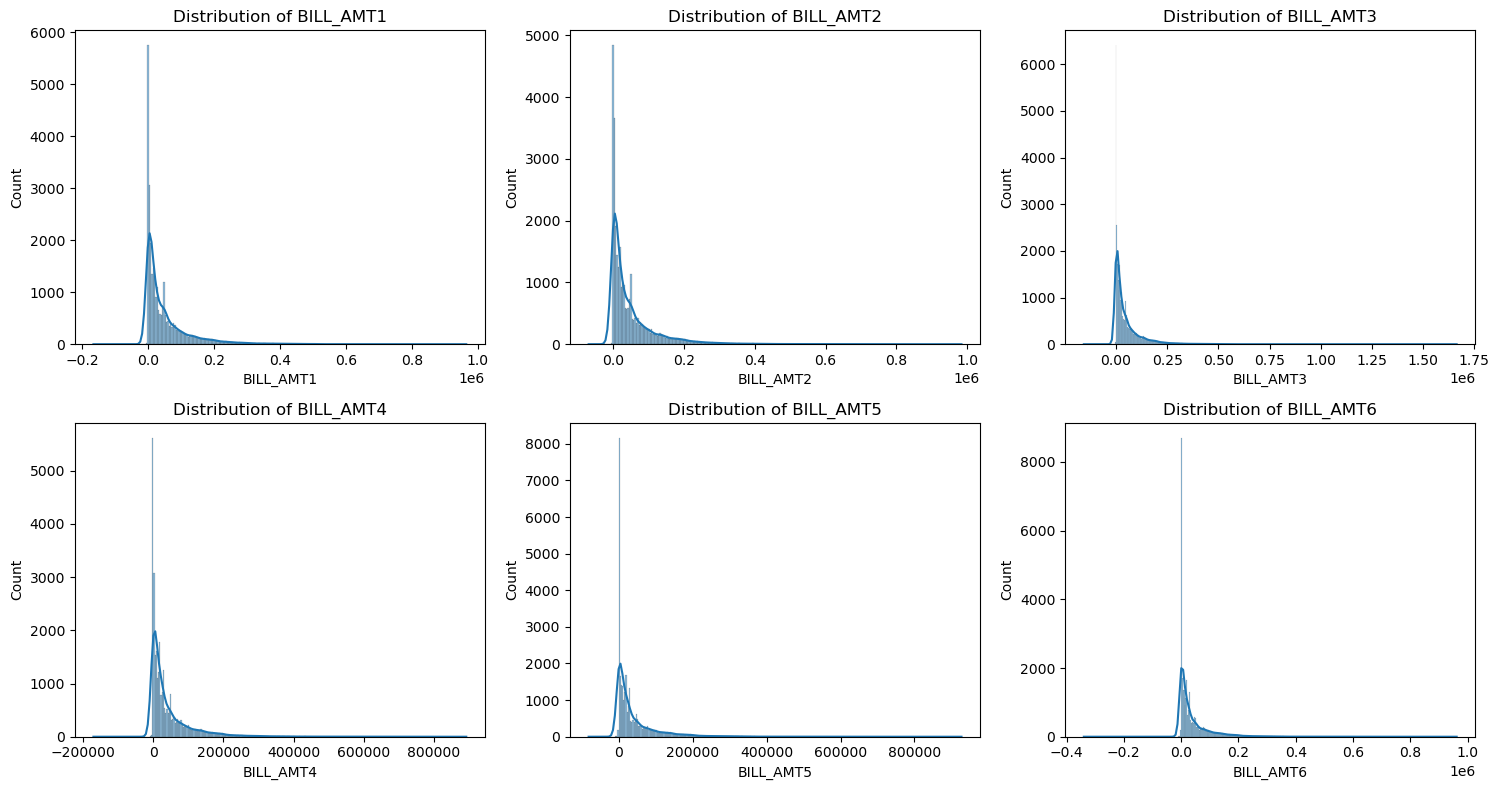

In [54]:
plot_continuous(df, bill_cols)

### Payment Costs Data

Amount of previous bill statement. With `PAY_AMT1` being for Septemeber up to `PAY_AMT6` corresponding to April.

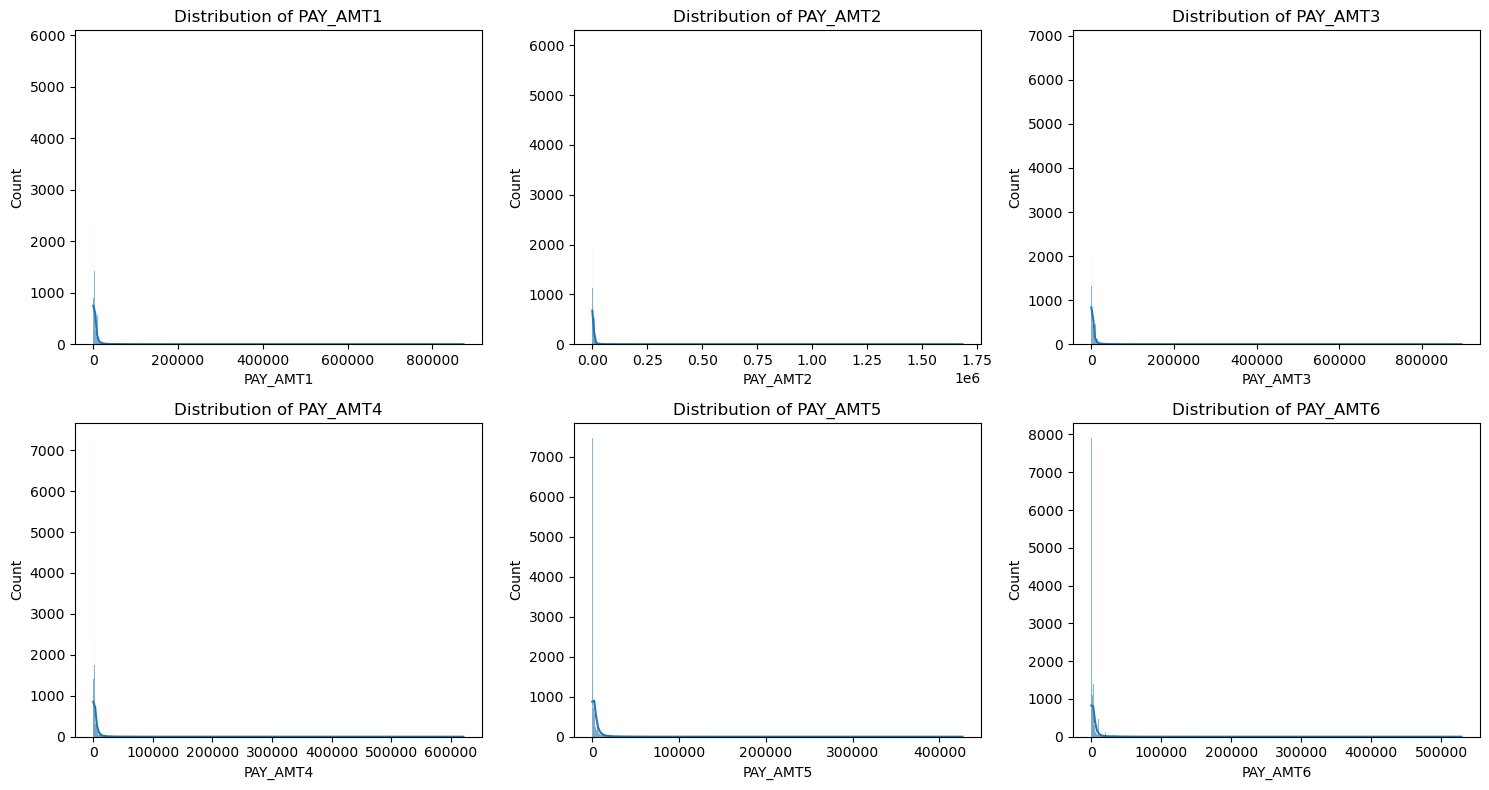

In [55]:
plot_continuous(df, payments_cols)
# should do log scale ???


### Credit Card Defaults Data

Whether or not the client defaulted in May 2005.

- 0 = NO DEFAULT
- 1 = DEFAULT 

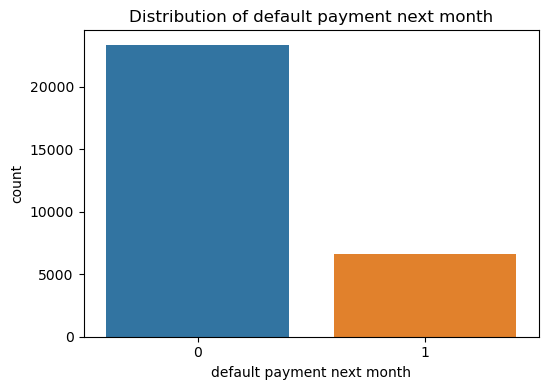

In [56]:
plot_discrete(df, target_col)

### Encoding Variables 

In [58]:
# ENcoding the "other values" in education together
df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4)

In [59]:
# grouping -2, -1, and 0 all as no delay/on time for simplicity, this maintains ordinal relationship
for i in range(0, 7):
    if f'PAY_{i}' in df.columns: #needed because order goes PAY_0 to PAY_2 ...
        df[f'PAY_{i}'] = df[f'PAY_{i}'].apply(lambda x: 0 if x <= 0 else x)

In [63]:
df['PAY_0'].unique()

array([2, 0, 1, 3, 4, 8, 7, 5, 6], dtype=int64)

In [65]:
# creating dummy variables for categroical columns -> AGE, SEX, EDUCATIOn
df_encoded = pd.get_dummies(df, columns=demographic_dis)

In [67]:
df_encoded.shape

(30000, 31)

In [68]:
df_encoded.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,0,0,0,0,3913,3102,...,0,1,0,1,0,0,0,1,0,0
2,120000,26,0,2,0,0,0,2,2682,1725,...,0,1,0,1,0,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,1,0,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,1,0,0,0,1,0,0
5,50000,57,0,0,0,0,0,0,8617,5670,...,1,0,0,1,0,0,0,1,0,0


In [70]:
# df_encoded.sample(15)

In [71]:
y = df_encoded['default payment next month']
X = df_encoded.drop(columns='default payment next month')

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, stratify=y, random_state=1)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 30), (6000, 30), (24000,), (6000,))

In [75]:
# scaling? Not needed for tree-based models but need to come up with an approach


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_report = classification_report(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred)

In [79]:
print(rfc_report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.38      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



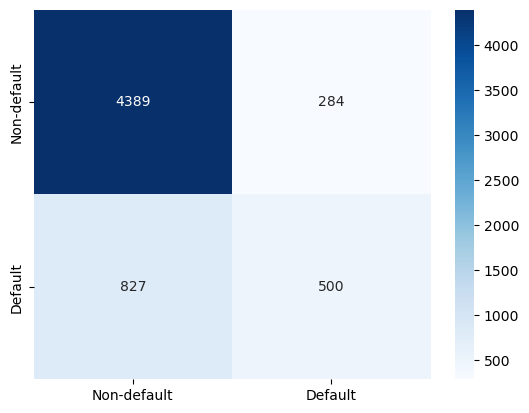

In [82]:
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',\
            xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.show()